In [1]:
%matplotlib inline

import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

sns.set_context('notebook', font_scale=1.5)

## Minimization of scalar function

In [2]:
def f(x):
    """Function to optimize."""
    
    return (x - 2) * x * (x + 2)**2

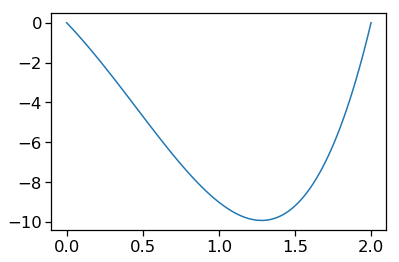

In [3]:
xp = np.linspace(0, 2, 100)
plt.plot(xp, f(xp))
pass

### Golder section

In [4]:
res_gs = opt.minimize_scalar(f, bracket=(0, 1, 2), method='golden')

In [5]:
res_gs

     fun: -9.914949590828146
    nfev: 43
     nit: 38
 success: True
       x: 1.28077641211428

In [6]:
res_gs.x

1.28077641211428

In [7]:
res_gs.fun

-9.914949590828146

### Brent

In [8]:
res_br = opt.minimize_scalar(f, method='brent')

In [9]:
res_br

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458

## Minimization of vector function

In [10]:
def f(x):
    """Vector function to optimize."""
    
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

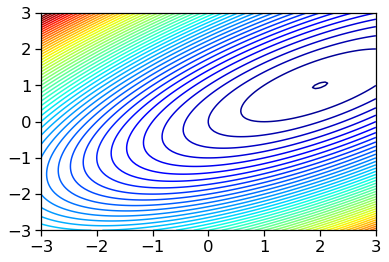

In [11]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,50, 1), cmap='jet');
plt.axis([-3,3,-3,3])
pass

### Nelder-Mead

In [12]:
x0 = [-2,-2]
opt.minimize(f, x0, method='nelder-mead')

 final_simplex: (array([[2.00003223, 1.00001216],
       [1.99995178, 0.99998242],
       [1.99995572, 1.00001351]]), array([-2., -2., -2.]))
           fun: -1.9999999994493396
       message: 'Optimization terminated successfully.'
          nfev: 86
           nit: 46
        status: 0
       success: True
             x: array([2.00003223, 1.00001216])

### Powell

In [13]:
x0 = [-2,-2]
opt.minimize(f, x0, method='powell')

   direc: array([[0.6  , 0.9  ],
       [0.024, 0.006]])
     fun: -2.0000000000000004
 message: 'Optimization terminated successfully.'
    nfev: 139
     nit: 4
  status: 0
 success: True
       x: array([1.99999999, 0.99999999])

## Checking derivatives

In [14]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

In [15]:
def grad(x):
    return [-2*x[1] - 2 + 2*x[0], 4*x[1] - 2*x[0]]

`check_grad` compares the results of using the grad function and a fintie approximation at point $x_0$

In [16]:
x0 = [-2,-2]
opt.check_grad(f, grad, x0)

0.0

`approx_fprime` gives the forward finite approximation estimate of `grad` at $x_0$ 

In [17]:
eps = np.sqrt(np.finfo(float).eps)

In [18]:
opt.approx_fprime(x0, f, eps)

array([-2., -4.])

In [19]:
grad(x0)

[-2, -4]